In [4]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.94 s (started: 2021-12-11 11:01:53 +00:00)


In [5]:
!pip install plotly #installing plotly

time: 2.83 s (started: 2021-12-11 11:01:56 +00:00)


plotly documentation [link text](https://plotly.com/python/pca-visualization/)

https://plotly.com/python/pca-visualization/

In [6]:
import pandas as pd #pandas
import numpy as np # numpy
import matplotlib.pyplot as plt #matplotlib
import seaborn as sns #seaborn
from sklearn.decomposition import PCA #pca

movie=pd.read_csv('/content/Movie_classification.csv') # loading movie classification data
#house=pd.read_csv('C:/Users/Administrator/Downloads/ml360datasets/kc_house.csv')
#loan=pd.read_csv('/content/loan_classification.csv')
#wine=pd.read_csv('C:/Users/Administrator/Downloads/ml360datasets/winequality-white.csv')

def null_replace(df): #replacing the null values
    for col in df.columns:
        if (df[col].dtypes == "object"): # checking the datatype
            df[col]=df[col].fillna(df[col].mode()[0]) #replacing the null values for catgeory column
        else:
            df[col]=df[col].fillna(df[col].mean()) # replacing the null values for numerical columns
    return df

def label_encoder(df):#doing the labelencoder for category columns
    from sklearn.preprocessing import LabelEncoder 
    le = LabelEncoder()
    for col in df.columns:
        if (df[col].dtypes == "object"):
            df[col] = df[col].astype(str)
            df[col] = le.fit_transform(df[col])
    return df


#house=null_replace(house)
#loan=null_replace(loan)
movie=null_replace(movie) #replacing with null values
#wine=null_replace(wine)
movie=label_encoder(movie) # performing label encoding

time: 50.3 ms (started: 2021-12-11 11:01:59 +00:00)


In [7]:
X=movie.iloc[:,:-1] # independent variables
Y=movie[['Start_Tech_Oscar']] # target variable

time: 5.01 ms (started: 2021-12-11 11:01:59 +00:00)


In [8]:
#splitting of data into train and test set
from sklearn.model_selection import train_test_split
def splitting(df):
  if len(movie) <= 1000:
    test_size=0.2
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, stratify = Y, random_state = 123) 
  return X_train, X_test, Y_train, Y_test



time: 4.75 ms (started: 2021-12-11 11:01:59 +00:00)


In [9]:
X_train, X_test, Y_train, Y_test=splitting(movie)

time: 13.4 ms (started: 2021-12-11 11:01:59 +00:00)


# plotting with 95% of variance 

In [10]:
def pca_ploting_95varience(df):

  df = X_train #saving xtrain into df

  features = X_train.columns.to_list() # saving column names as list for plotting 

  # performing standardscalar on independent columns
  from sklearn.preprocessing import StandardScaler
  sc=StandardScaler()
  X_train_sc=sc.fit_transform(X_train)#scalling on only indepedent features 

  from sklearn.decomposition import PCA # import pca
  pca=PCA(n_components=0.95) #setting no of components to 0.95 means cupters 95%of varience 
  components=pca.fit_transform(X_train_sc)  #applying pca on scaled data

  total_var = pca.explained_variance_ratio_.sum() * 100 # calculating total variance for displaying

  # creating labels like PCA1,PCA2 with varience cuptered by pca
  labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
  }
  import plotly.express as px #importing plotly 
  fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(len(labels)),
    color=Y_train # giving target variable for visualization 
  ,title=f'Total Explained Variance: {total_var:.2f}%')

  fig.update_traces(diagonal_visible=False) # sets diagnole elements to off

  #setting layout with color
  fig.update_layout(
      autosize=True,width=3000,height=3000, # main parameter is height and width
      margin=dict(l=50,r=50,b=100,t=100,pad=4),
      paper_bgcolor="LightSteelBlue",
  )
  fig.show()

time: 19.4 ms (started: 2021-12-11 11:01:59 +00:00)


In [11]:
pca_ploting_95varience(X_train)

time: 2.13 s (started: 2021-12-11 11:01:59 +00:00)


# plotting in 2_D

In [12]:
def two_d_pca(df):
  df = X_train #saving xtrain into df

  features = X_train.columns.to_list() # saving column names as list for plotting 

  # performing standardscalar on independent columns
  from sklearn.preprocessing import StandardScaler
  sc=StandardScaler()
  X_train_sc=sc.fit_transform(X_train)#scalling on only indepedent features 

  from sklearn.decomposition import PCA # import pca
  pca=PCA(n_components=2) #setting no of components to 2 for two dimension visualization
  components=pca.fit_transform(X_train_sc)  #applying pca on scaled data

  total_var = pca.explained_variance_ratio_.sum() * 100 # calculating total variance for displaying

  # creating labels like PCA1,PCA2 with varience cuptered by pca
  labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
  }
  import plotly.express as px

  fig = px.scatter(components, x=0, y=1, color=Y_train,labels=labels, title=f'Total Explained Variance: {total_var:.2f}%')
  fig.show()

time: 22.2 ms (started: 2021-12-11 11:02:01 +00:00)


In [13]:
two_d_pca(X_train)

time: 460 ms (started: 2021-12-11 11:02:01 +00:00)


# plotting in 3_D


In [14]:
def three_d_pca(df):
  df = X_train #saving xtrain into df

  features = X_train.columns.to_list() # saving column names as list for plotting 

  # performing standardscalar on independent columns
  from sklearn.preprocessing import StandardScaler
  sc=StandardScaler()
  X_train_sc=sc.fit_transform(X_train)#scalling on only indepedent features 

  from sklearn.decomposition import PCA # import pca
  pca=PCA(n_components=3) #setting no of components to 2 for two dimension visualization
  components=pca.fit_transform(X_train_sc)  #applying pca on scaled data

  total_var = pca.explained_variance_ratio_.sum() * 100 # calculating total variance for displaying

  # creating labels like PCA1,PCA2 with varience cuptered by pca
  labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
  }
  import plotly.express as px

  fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=Y_train,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
  fig.show()

time: 18.7 ms (started: 2021-12-11 11:02:02 +00:00)


In [15]:
three_d_pca(X_train)

time: 305 ms (started: 2021-12-11 11:02:02 +00:00)


# pairplots

pairplots works with **dataframe** only.To show color differences we need to mention **hue** parameter .for that parameter we need to include **targe**t variable in training data only for visualization

In [16]:
  def scalling(df):
    
    from sklearn.preprocessing import StandardScaler
    sc=StandardScaler()
    X_train_sc=sc.fit_transform(X_train)#scalling on only indepedent features 
    return X_train_sc

  def pca(df):

    from sklearn.decomposition import PCA # import pca
    pca=PCA(n_components=0.95) #setting no of components to 0.95 means cupters 95%of varience 
    components=pca.fit_transform(X_train_sc) #applying pca on scaled data
    return components

time: 6.05 ms (started: 2021-12-11 11:02:02 +00:00)


In [17]:
X_train_sc=scalling(X_train) #x_train_sc contains scaled x train data
components=pca(X_train) #components contains pca data

time: 10.6 ms (started: 2021-12-11 11:02:02 +00:00)


In [18]:
#creates a list of col names for pca  Ex:-PCA1,PCA2
col=[]
for i in range(1,components.shape[1]+1):
  b='PCA'+str(i)
  col.append(b)
new_data=pd.DataFrame(data=components,columns=col) # creating dataframe for pairplots visualization

time: 3.87 ms (started: 2021-12-11 11:02:02 +00:00)


In [19]:
new_data['target']=Y_train #adding target variable to x train for visualization

time: 3.48 ms (started: 2021-12-11 11:02:02 +00:00)


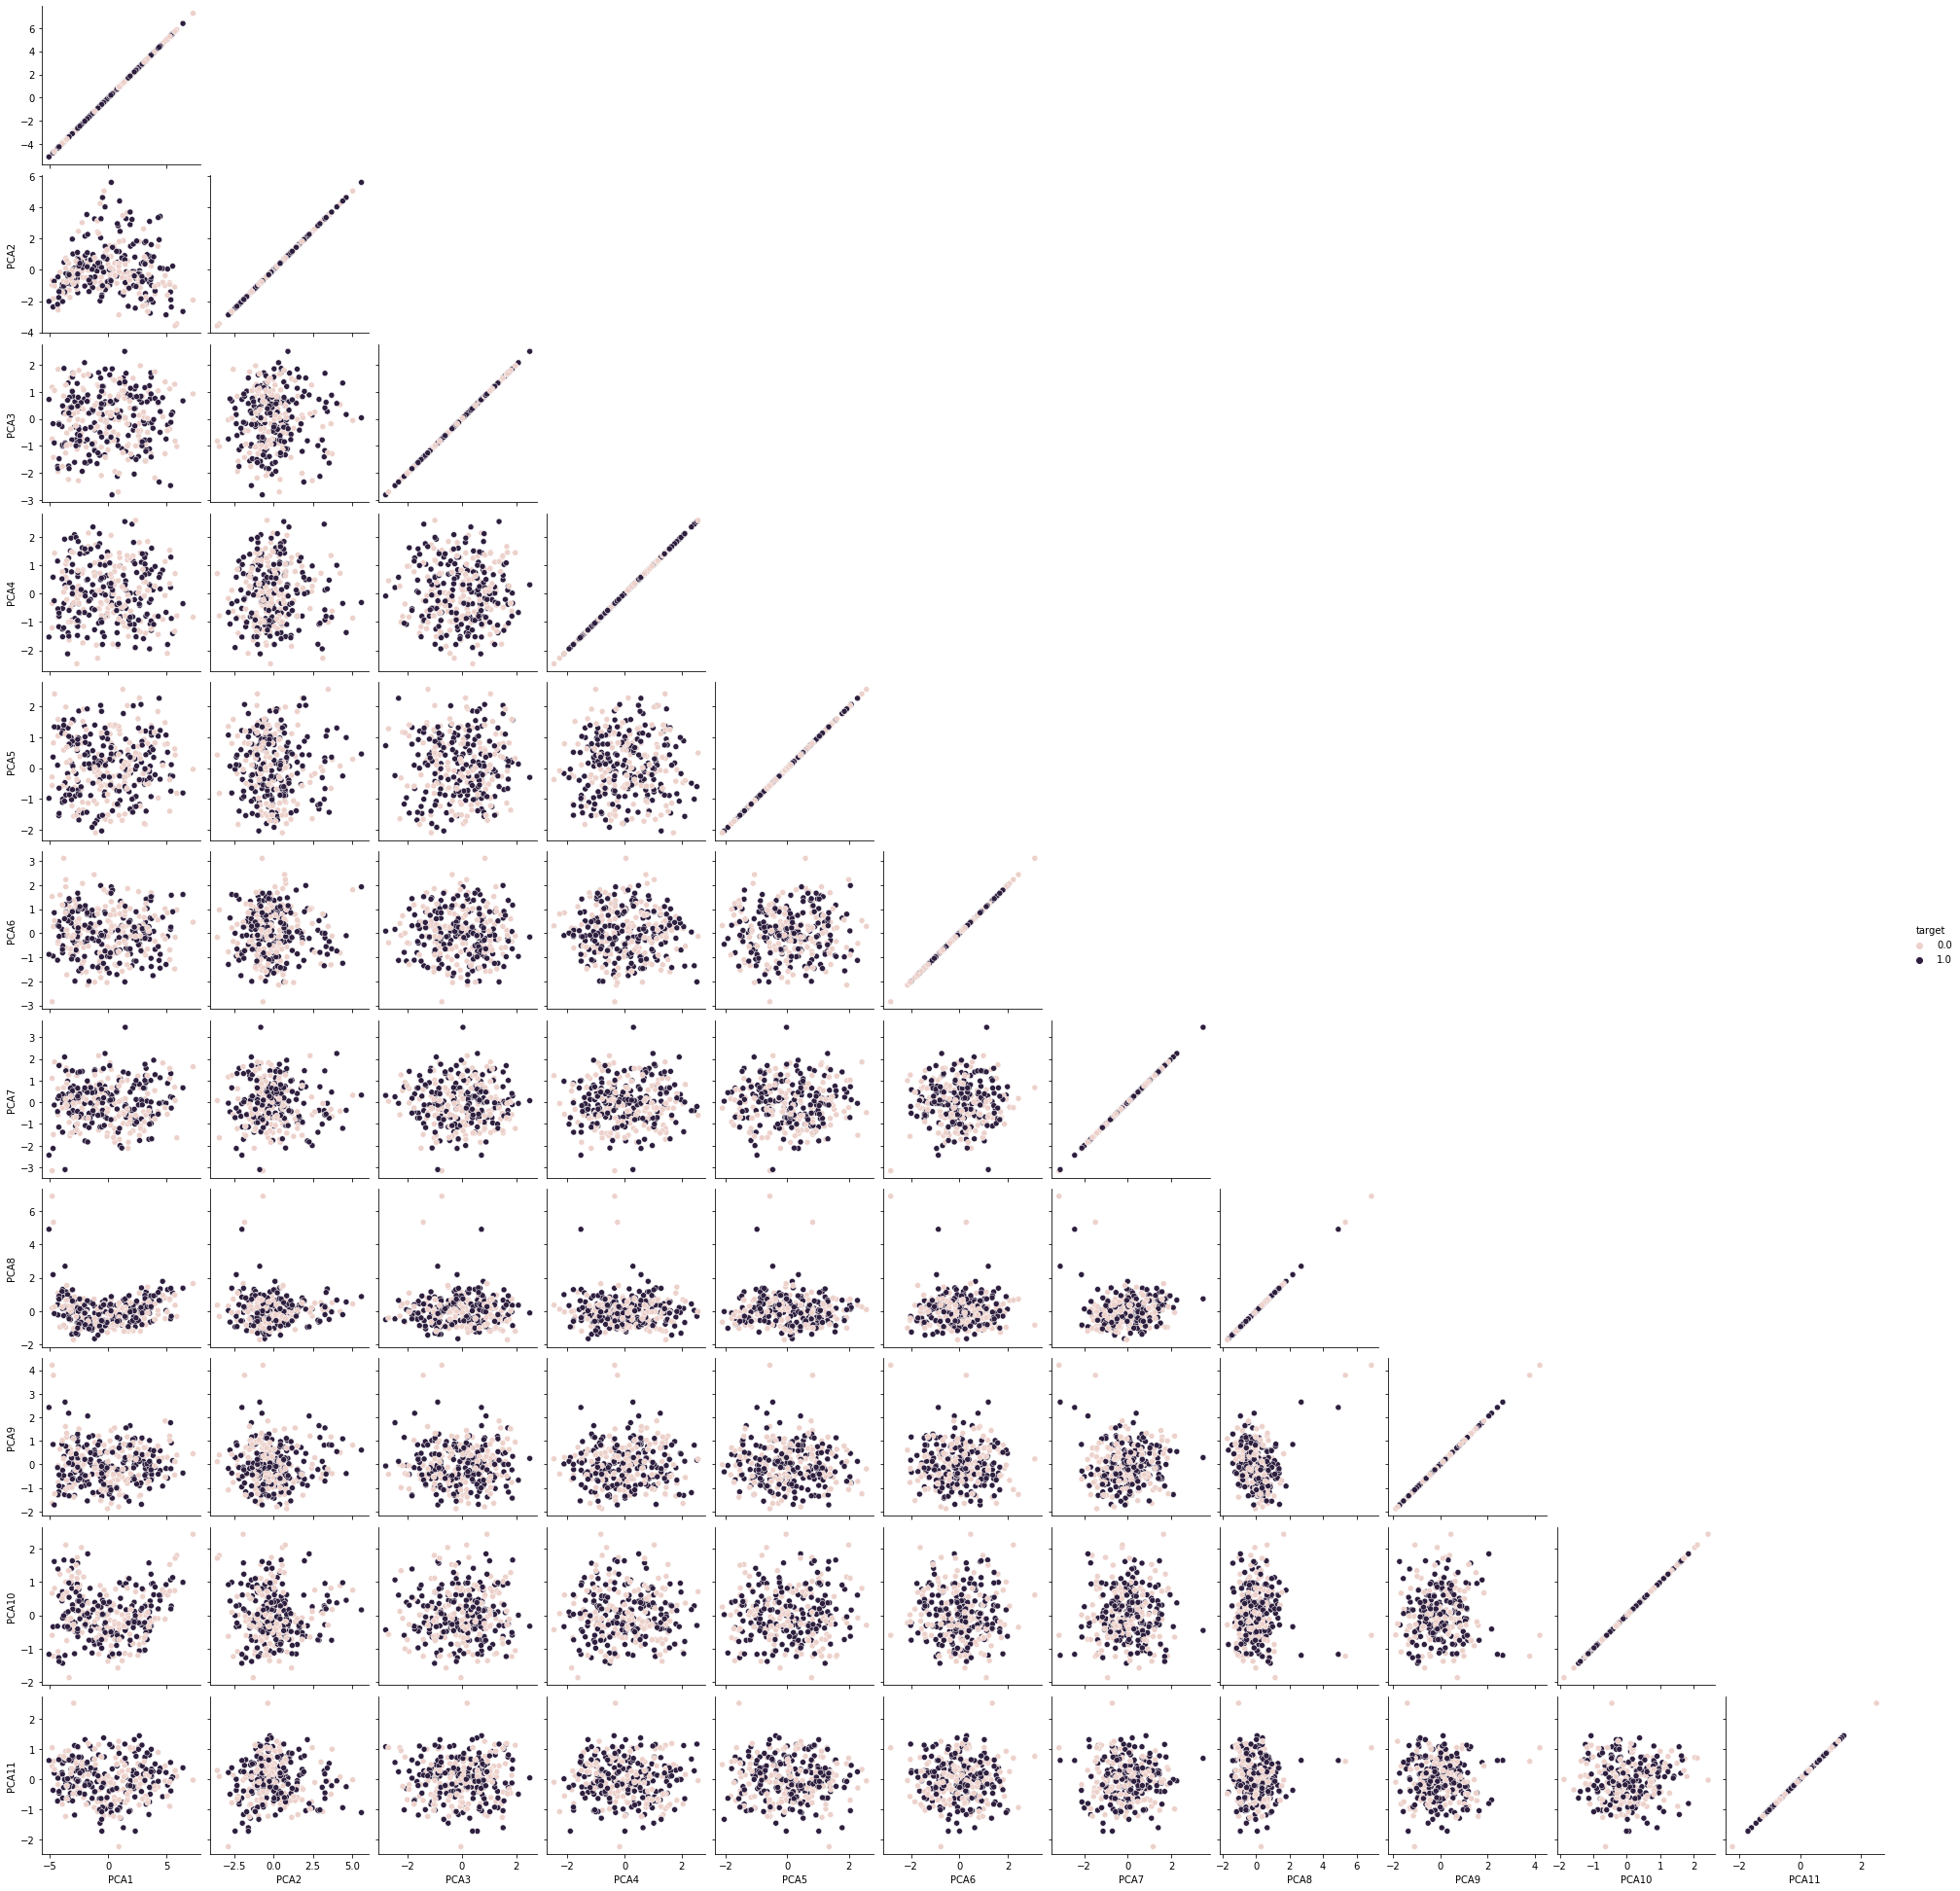

time: 32.8 s (started: 2021-12-11 11:02:02 +00:00)


In [20]:
sns.pairplot(data=new_data,hue='target',corner=True,diag_kind=None)

**observations:**

1)  Plotly visualization looks more **attractive** then pairplots

2) Time taken for plotly to create plots  is very very less **(time in milli seconds)**

3) Time take for pair plots to create plots in **seconds and minutes** some times

4) When we point a cursor on plot we will get coresponding values on plotly .This feature was not there in pair plots 

5) With adding some parameters to paipolts we can get almost same visualization as ploty. but it takes more time to display it **(time in minutes)**

6) The only parameter we need to take care in plotly is **height,weidth** which decides the height and width of graph (**as per of my knowledge**)

7) In plotly we can use **dash** which creates more meaning while visualization 